In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score


In [236]:
data = pd.read_csv("Heart.csv")
data.tail(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0


In [177]:
# data informations
data.shape

(303, 14)

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [179]:
#validate duplicated records
data.duplicated().sum()

1

In [180]:
# remove duplicated records
data.drop_duplicates(inplace=True)

In [181]:
# again check duplicate records
data.duplicated().sum()

0

In [182]:
#validate null records
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

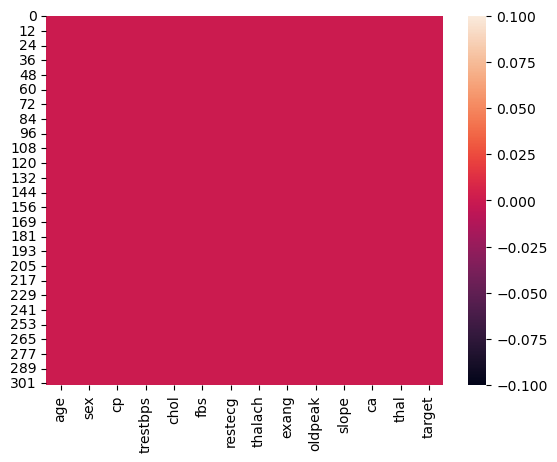

In [19]:
sns.heatmap(data= data.isnull())
plt.show()

In [183]:
# check balance of output
data.target.value_counts()

target
1    164
0    138
Name: count, dtype: int64

In [ ]:
# Explore data


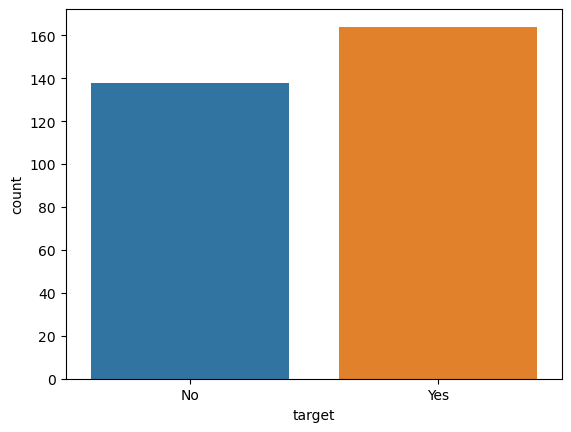

In [184]:
# find data base on targe

sns.countplot(x="target",data=data)
plt.xticks(ticks=[0,1],labels=["No","Yes"])
plt.show()

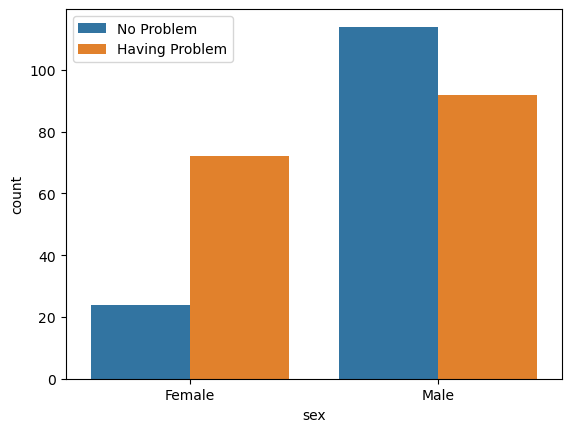

In [35]:
# visualize cross sex
sns.countplot(x="sex",hue="target",data=data)
plt.xticks(ticks=[0,1],labels=["Female","Male"])
plt.legend(["No Problem","Having Problem"])
plt.show()

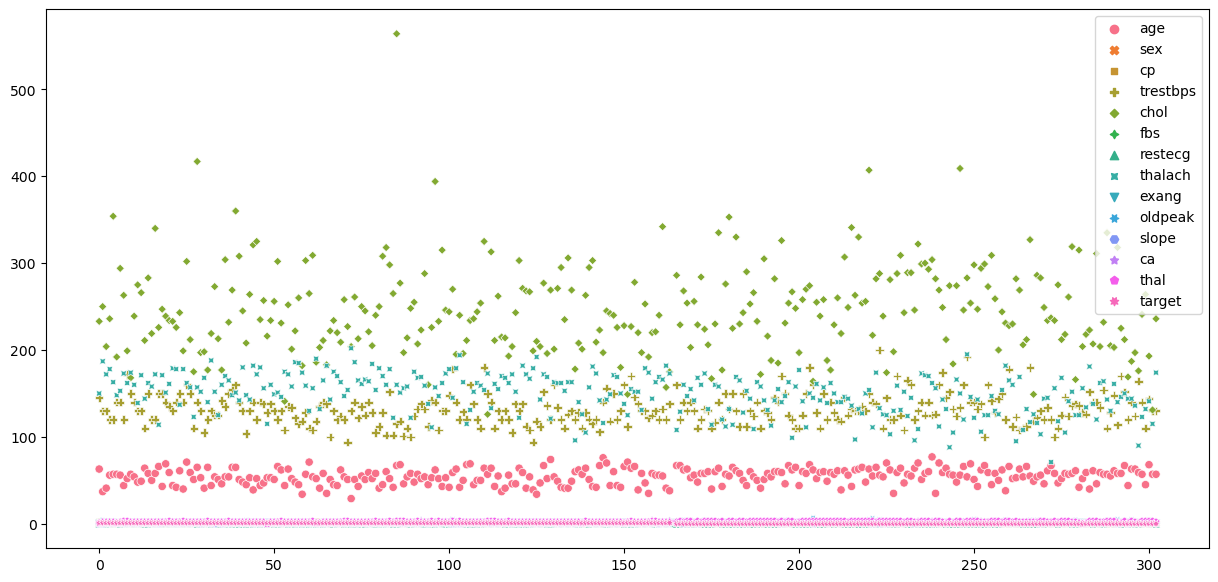

In [219]:
plt.figure(figsize=(15,7))
sns.scatterplot(data)
plt.show()

In [188]:
x = data.drop("target",axis=1)
y=data["target"]


In [231]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)


In [190]:
lr = LogisticRegression()

In [191]:
lr.fit(x_train,y_train)

C:\Users\10713310\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [213]:
pr = lr.predict(x_train)

In [214]:
# check score
lr_score= lr.score(x_train,y_train)*100
print(lr_score)

# matrics
accuracy_score(y_train,pr)*100

83.81742738589212


83.81742738589212

In [241]:
lr.predict([[57,0,1,130,236,0,0,174,0,0.0,1,1,2]])

C:\Users\10713310\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)